# Dry Beans Algorithm

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import io
import sagemaker.amazon.common as smac

import boto3
from sagemaker import get_execution_role
import sagemaker
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#pip install boto3==1.17.106

# Loading the data from s3

In [12]:
"""role = get_execution_role()
bucket = 'ars-mlops-projects'
subfolder = 'dry-beans'
data_key = 'data/dry-beans.csv'
data_location = 's3://{}/{}/{}'.format(bucket,subfolder,data_key)

df = pd.read_csv(data_location,low_memory=False)"""

"role = get_execution_role()\nbucket = 'ars-mlops-projects'\nsubfolder = 'dry-beans'\ndata_key = 'data/dry-beans.csv'\ndata_location = 's3://{}/{}/{}'.format(bucket,subfolder,data_key)\n\ndf = pd.read_csv(data_location,low_memory=False)"

In [9]:
Key = 'dry-beans/data/dry-beans.csv'

In [20]:
import boto3
import io
s3 = boto3.client('s3')
obj = s3.get_object(Bucket=bucket, Key=Key)
df = pd.read_csv(io.BytesIO(obj['Body'].read()))

In [21]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# Cleaning, transdorming, analyzie and prepare the dataset

In [22]:
df.shape

(13611, 17)

In [23]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [24]:
list(df.columns)

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'Class']

In [26]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [30]:
# Transforming some of the values into correct data types

df['Class'] = df['Class'].replace({'DERMASON': 0, 'SIRA': 1, 'SEKER': 2, 'HOROZ': 3, 'CALI':4, 'BARBUNYA':5, 'BOMBAY':6 }) # target column

In [31]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class                int64
dtype: object

In [34]:
%matplotlib inline
sns.set_context("paper",font_scale=1.4)

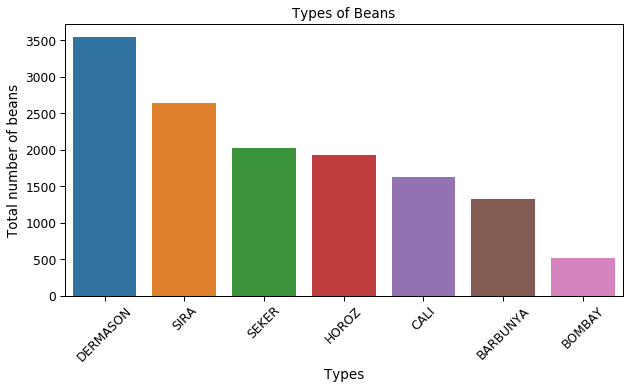

In [41]:
m_cts = (df['Class'].value_counts())
m_ctsx = m_cts.index
m_ctsy = m_cts.to_numpy()
f, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=m_ctsx,y=m_ctsy)
ax.set_title('Types of Beans')
ax.set_xlabel('Types')
ax.set_ylabel('Total number of beans')
ax.set_xticklabels(['DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BARBUNYA', 'BOMBAY'])
plt.xticks(rotation=45)
plt.show()

In [40]:
df['Class'].value_counts().index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [42]:
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,0.772475
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,0.858246
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,0.815862
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,0.784389
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,0.308010
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,0.239292
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,0.773980
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,0.835496
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.017542
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,-0.325609


In [43]:
df = df.sample(frac=1).reset_index(drop=True)

rand_split = np.random.rand(len(df))
train_list = rand_split < 0.8
val_list = (rand_split < 0.8) & (rand_split < 0.9)
test_list = rand_split >=0.9

data_train = df[train_list]
data_val = df[val_list]
data_test = df[test_list]


In [44]:
pd.concat([data_train['Class'],data_train.drop(['Class'],axis=1)],axis=1).to_csv('data/train.csv',index=False,header=False)

In [45]:
pd.concat([data_val['Class'],data_val.drop(['Class'],axis=1)],axis=1).to_csv('data/validation.csv',index=False,header=False)

In [48]:
boto3.Session().resource('s3').Bucket(bucket).Object('dry-beans/data/train/train.csv').upload_file('data/train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object('dry-beans/data/validation/validation.csv').upload_file('data/validation.csv')


## Creating and training our Model (XGBoost)

In [49]:
from sagemaker import image_uris
container = image_uris.retrieve('xgboost',boto3.Session().region_name,'1')

In [50]:
s3_input_train = sagemaker.inputs.TrainingInput(s3_data='s3://ars-mlops-projects/dry-beans/data/train'.format(bucket), content_type='csv')
s3_input_validation = sagemaker.inputs.TrainingInput(s3_data='s3://ars-mlops-projects/dry-beans/data/validation/validation.csv'.format(bucket), content_type='csv')


In [55]:
job_name = 'dey-beans-xgboost-job-{}'.format(datetime.now().strftime("%Y%m%d%H%M%S"))
print('Here is the job name {}'.format(job_name))
output_location = 's3://ars-mlops-projects/dry-beans/data/output/'.format(bucket)

Here is the job name dey-beans-xgboost-job-20220416114148


In [56]:
sess = sagemaker.Session()

xgb = sagemaker.estimator.Estimator(
                        container,
                        role,
                        instance_count=1, 
                        instance_type='ml.m4.xlarge',
                        output_path=output_location,
                        sagemaker_session=sess
    )

In [57]:
xgb.set_hyperparameters(objective='multi:softmax',
                        num_class = 7,
                        num_round=100)
data_channels = {
    'train': s3_input_train,
    'validation' : s3_input_validation
}

xgb.fit(data_channels,job_name=job_name)

2022-04-16 11:41:51 Starting - Starting the training job...
2022-04-16 11:42:16 Starting - Preparing the instances for trainingProfilerReport-1650109311: InProgress
.........
2022-04-16 11:43:34 Downloading - Downloading input data...
2022-04-16 11:44:15 Training - Downloading the training image.....Arguments: train
[2022-04-16:11:45:03:INFO] Running standalone xgboost training.
[2022-04-16:11:45:03:INFO] File size need to be processed in the node: 3.65mb. Available memory size in the node: 8469.11mb
[2022-04-16:11:45:03:INFO] Determined delimiter of CSV input is ','
[11:45:03] S3DistributionType set as FullyReplicated
[11:45:03] 10831x16 matrix with 173296 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2022-04-16:11:45:03:INFO] Determined delimiter of CSV input is ','
[11:45:03] S3DistributionType set as FullyReplicated
[11:45:03] 10831x16 matrix with 173296 entries loaded from /opt/ml/input/data/validation?format=csv&label_column=0&delimiter=,
[11

## Creating a Linear Learner Model 

In [60]:
np.random.seed(0)
rand_split = np.random.rand(len(df))
train_list = rand_split < 0.8
val_list = (rand_split >= 0.8 ) & (rand_split < 0.9)
test_list = rand_split >= 0.9

data_train = df[train_list]
data_val = df[val_list]
data_test = df[test_list]


# Rearrange Columns

cols = list(data_train)
cols.insert(0,cols.pop(cols.index('Class')))
data_train = data_train[cols]

cols = list(data_val)
cols.insert(0,cols.pop(cols.index('Class')))
data_val = data_val[cols]

cols = list(data_test)
cols.insert(0, cols.pop(cols.index('Class')))
data_test = data_test[cols]

# Breaks the datasets into attribute numpy.ndarray and the same for target attribute.  
train_X = data_train.drop(columns='Class').values
train_y = data_train['Class'].values

val_X = data_val.drop(columns='Class').values
val_y = data_val['Class'].values

test_X = data_test.drop(columns='Class').values
test_y = data_test['Class'].values

In [62]:
train_file = 'dry_beans_train_recordIO_protobuf.data'
#s3://ars-mlops-projects/dry-beans/data/LinearLearner/

f = io.BytesIO()
smac.write_numpy_to_dense_tensor(f,train_X.astype('float32'),train_y.astype('float32'))
f.seek(0)

boto3.Session().resource('s3').Bucket(bucket).Object('dry-beans/data/LinearLearner/{}'.format(train_file)).upload_fileobj(f)
training_recordIO_protobuf_location = 's3://{}/dry-beans/data/LinearLearner/{}'.format(bucket, train_file)
print('The Pipe mode recordIO protobuf training data: {}'.format(training_recordIO_protobuf_location))

The Pipe mode recordIO protobuf training data: s3://ars-mlops-projects/dry-beans/data/LinearLearner/dry_beans_train_recordIO_protobuf.data


In [68]:
validation_file = 'dry_beans_validatioin_recordIO_protobuf.data'

f = io.BytesIO()
smac.write_numpy_to_dense_tensor(f, val_X.astype('float32'), val_y.astype('float32'))
f.seek(0)

boto3.Session().resource('s3').Bucket(bucket).Object('dry-beans/data/LinearLearner/{}'.format(validation_file)).upload_fileobj(f)
validate_recordIO_protobuf_location = 's3://ars-mlops-projects/dry-beans/data/LinearLearner/{}'.format(validation_file)
print('The Pipe mode recordIO protobuf validation data: {}'.format(validate_recordIO_protobuf_location))

The Pipe mode recordIO protobuf validation data: s3://ars-mlops-projects/dry-beans/data/LinearLearner/dry_beans_validatioin_recordIO_protobuf.data


In [72]:
from sagemaker import image_uris
container = image_uris.retrieve('linear-learner',boto3.Session().region_name,'1')
# Create a training job name
job_name = 'dry-beans-linear-learner-job-{}'.format(datetime.now().strftime("%Y%m%d%H%M%S"))
print('Here is the job name {}'.format(job_name))

# Here is where the model-artifact will be stored
output_location = 's3://ars-mlops-projects/dry-beans/data/LinearLearner/learner_output/'.format(bucket)

Here is the job name dry-beans-linear-learner-job-20220416121017


In [73]:
print('The feature_dim hyperparameter needs to be set to {}.'.format(data_train.shape[1] - 1))
f_dim = data_train.shape[1] - 1

The feature_dim hyperparameter needs to be set to 16.


In [74]:
sess = sagemaker.Session()

linear = sagemaker.estimator.Estimator(container,
                                        role,
                                        instance_count=1,
                                        instance_type='ml.c4.xlarge',
                                        output_path=output_location,
                                        sagemaker_session=sess,
                                        input_mode='Pipe'
                                        )

linear.set_hyperparameters(feature_dim = f_dim,
                            predictor_type = 'multiclass_classifier',
                            num_classes=7)
data_channels = {
    'train' : training_recordIO_protobuf_location,
    'validation' : validate_recordIO_protobuf_location
}

linear.fit(data_channels,job_name=job_name)

2022-04-16 12:10:20 Starting - Starting the training job...
2022-04-16 12:10:49 Starting - Preparing the instances for trainingProfilerReport-1650111020: InProgress
.........
2022-04-16 12:12:09 Downloading - Downloading input data...
2022-04-16 12:12:50 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/16/2022 12:12:57 INFO 140428111259456 integration.py:636] worker started
[04/16/2022 12:12:57 INFO 140428111259456] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01',

In [75]:
print('Here is the location of the trained Linear Learner model: {}/{}/output/model.tar.gz'.format(output_location, job_name))

Here is the location of the trained Linear Learner model: s3://ars-mlops-projects/dry-beans/data/LinearLearner/learner_output//dry-beans-linear-learner-job-20220416121017/output/model.tar.gz
